<a href="https://www.kaggle.com/code/dakshdewan/boston-housing-analysis?scriptVersionId=221058514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')
data = df
print(data.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


First 5 Rows

RM = An Average number of rooms per dwelling in the neighbourhood.

LSTAT = Percentage of People who have low income in the neighbourhood.

PTRATIO = Pupil Teacher ratio in this specific area.

MEDV = Median Value of home.


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()



,RM,LSTAT,PTRATIO,MEDV
count,489.00,489.00,489.00,489.00
mean,6.24,12.94,18.52,454342.94
std,0.64,7.08,2.11,165340.28
min,3.56,1.98,12.60,105000.00
25%,5.88,7.37,17.40,350700.00
50%,6.18,11.69,19.10,438900.00
75%,6.58,17.12,20.20,518700.00
max,8.40,37.97,22.00,1024800.00


**Count** - Number of Observation (489 each columns)

**Mean** - Avarage value of each variable.

**Standard Deviation** - Measures how much the values vary from the mean.
                     Higher values indicate more spread in data.

**Minimum** - The smallest value recorded in the dataset.

**25% (First Quartile - Q1)** - 25% of data falls below this value.

**50% (Median/ Second Quartile -Q2)** - The middle value of the dataset.

**75% (Third Quartile - Q3)** - 75% of data falls below this value.

**Maximum** - The largest value recorded in the dataset.

**Room Count (RM)**:

Houses have an average of 6.24 rooms per dwelling.
The smallest has 3.56 rooms, while the largest has 8.40 rooms.

**Low-Income Population (LSTAT)**:

On average, 12.94% of the population is in the low-income category.
Some areas have as low as 1.98%, while others have as high as 37.97%.

**Pupil-Teacher Ratio (PTRATIO)**:

The average ratio is 18.52 students per teacher.
It ranges from 12.60 (small class sizes) to 22.00 (larger class sizes).

**Median Home Value (MEDV)**:

The average home price is $454,342.94.
The cheapest home is $105,000, and the most expensive is $1,024,800.
50% of homes are priced below $438,900, while 25% are above $518,700.

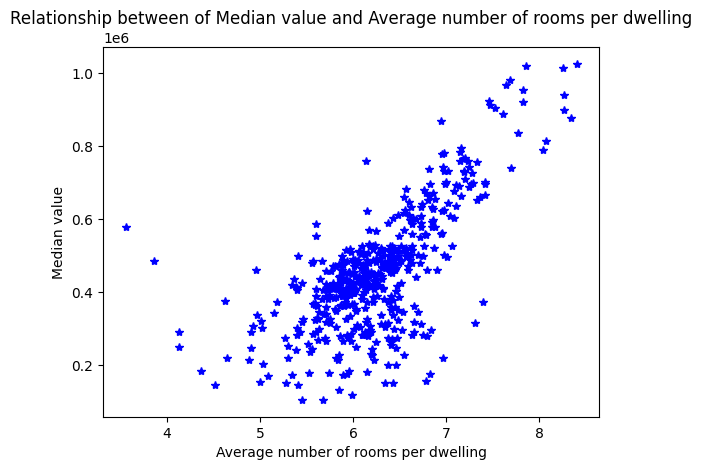

In [4]:
x = data['RM']
y = data['MEDV']

# plt.hist(x)
plt.plot(x, y, marker='*', color='b', linestyle='none')

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value')
plt.title('Relationship between of Median value and Average number of rooms per dwelling')
# print(data.head())
plt.show()

**Positive Correlation**: In this graph, it is clearly visible that in most cases, as the number of rooms increases, the property price also increases. However, there are some exceptions where the property price is significantly high despite having fewer rooms, and vice versa. Nevertheless, these exceptions are quite rare.

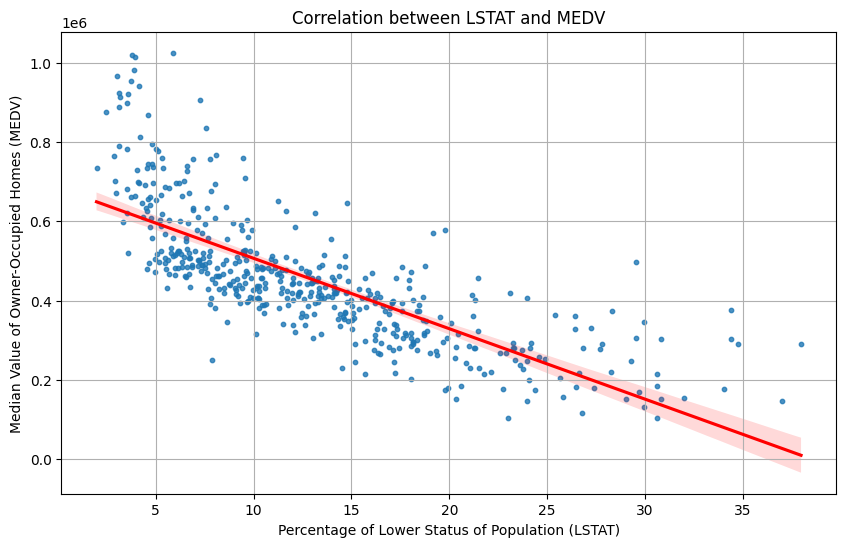

In [5]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LSTAT', y='MEDV', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Percentage of Lower Status of Population (LSTAT)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Correlation between LSTAT and MEDV')
plt.grid(True)
plt.show()

**Negative Correlation**: It means as the percentage of lower-status population (LSTAT) increases, the median value of owner-occupied homes (MEDV) tends to decrease. 

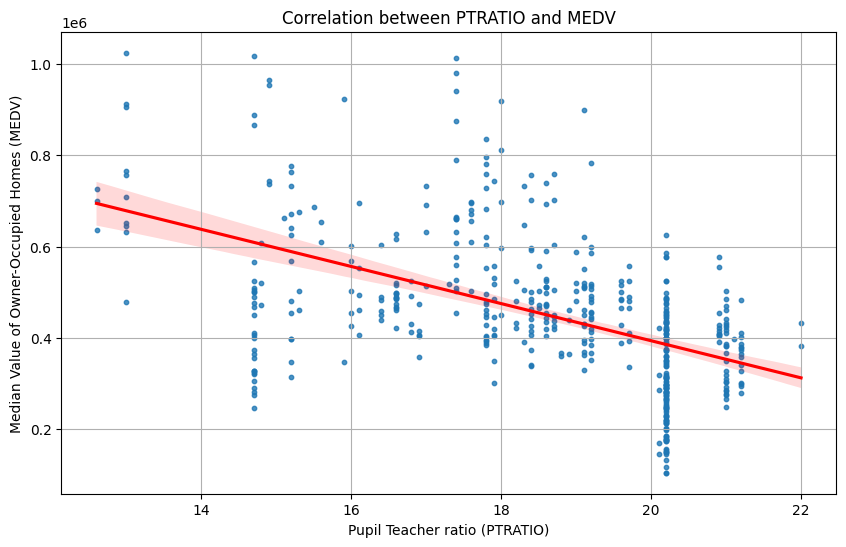

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='PTRATIO', y='MEDV', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Pupil Teacher ratio (PTRATIO)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Correlation between PTRATIO and MEDV')
plt.grid(True)
plt.show()

**Negative Correlation**: A higher student-teacher ratio often indicates lower education quality, as it means teachers have less time to devote to each student. This can result in less effective teaching, slower student progress, and a less personalized educational experience. Families looking to purchase homes typically prioritize areas with higher quality schools, so neighborhoods with higher student-teacher ratios may be less desirable. Consequently, property values in these areas can be negatively affected, as strong schools significantly contribute to a community's appeal and can drive up home prices through increased demand.

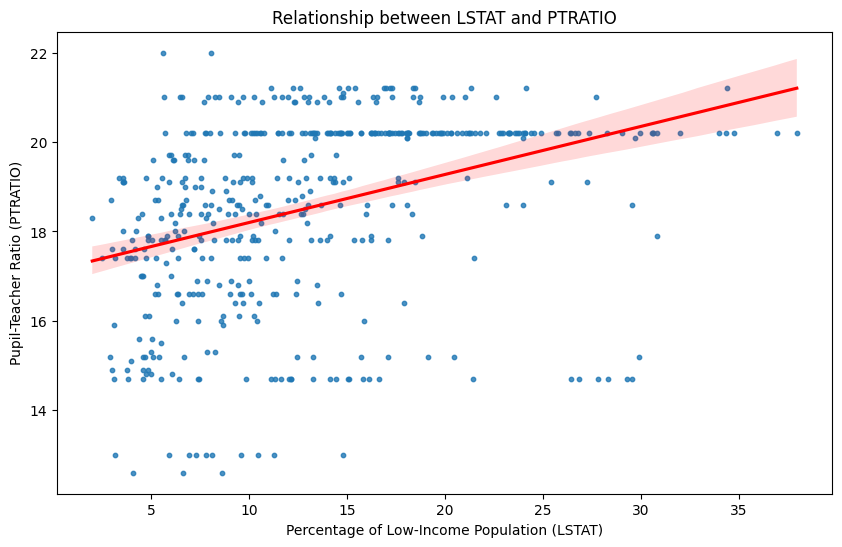

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LSTAT', y='PTRATIO', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Percentage of Low-Income Population (LSTAT)')
plt.ylabel('Pupil-Teacher Ratio (PTRATIO)')
plt.title('Relationship between LSTAT and PTRATIO')
plt.show()

**Positive Correlation**: Higher LSTAT (more low-income residents) often correlates with higher PTRATIO (more students per teacher) due to less funding for schools and larger class sizes. Conversely, lower LSTAT areas (fewer low-income residents) typically have lower PTRATIO due to better-funded schools and smaller class sizes. A positive correlation between LSTAT and PTRATIO indicates overcrowded schools in low-income areas. If the correlation is weak or nonexistent, it suggests that the pupil-teacher ratio is not significantly influenced by income levels.